In [2]:
# настройка ширины страницы блокнота .......................................
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

/var/folders/gq/w6zd94k524d3bqm_6rn2hrp80000gn/T/ipykernel_20426/2985171075.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [3]:
# загрузка пакетов: инструменты --------------------------------------------
# работа с массивами
import numpy as np
# фреймы данных
import pandas as pd
# графики
import matplotlib as mpl
# стили и шаблоны графиков на основе matplotlib
import seaborn as sns
# перекодировка категориальных переменных
from sklearn.preprocessing import LabelEncoder
# тест Шапиро-Уилка на нормальность распределения
from scipy.stats import shapiro
# для таймера
import time
# загрузка пакетов: модели -------------------------------------------------
# линейные модели
import sklearn.linear_model as skl_lm
# расчёт MSE
from sklearn.metrics import mean_squared_error
# кросс-валидация
# кросс-валидация
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.model_selection import KFold, cross_val_score

In [4]:
# константы
# ядро для генератора случайных чисел
my_seed = 27
# создаём псевдоним для короткого обращения к графикам
plt = mpl.pyplot
# настройка стиля и отображения графиков
# примеры стилей и шаблонов графиков:
# http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
mpl.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
# раскомментируйте следующую строку, чтобы посмотреть палитру
# sns.color_palette("Set2")

In [5]:
# читаем таблицу из файла .csv во фрейм
fileURL = 'https://raw.githubusercontent.com/ania607/ML/refs/heads/main/data/Auto_for_lab.csv'
DF_raw = pd.read_csv(fileURL)
# выясняем размерность фрейма
print('Число строк и столбцов в наборе данных:\n', DF_raw.shape)

Число строк и столбцов в наборе данных:
 (392, 10)


In [6]:
# первые 5 строк фрейма
DF_raw.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,cyl_over_4
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,1


In [7]:
# типы столбцов фрейма
DF_raw.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
cyl_over_4        int64
dtype: object

In [8]:
# считаем пропуски в каждом столбце
DF_raw.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
cyl_over_4      0
dtype: int64

In [9]:
# оставляем в наборе данных только то, что нужно
# (плюс метки регионов для графиков)
DF_all = DF_raw[['mpg', 'horsepower', 'weight', 'cyl_over_4']].copy()


In [10]:
del DF_raw

In [11]:
# данные для построения моделей
DF = DF_all.sample(frac = 0.9, random_state = my_seed)
# данные для прогнозов
DF_predict = DF_all.drop(DF.index)

In [12]:
# описательные статистики для непрерывных переменных
DF[['mpg', 'horsepower', 'weight', 'cyl_over_4']].describe()

,mpg,horsepower,weight,cyl_over_4
count,353.000000,353.000000,353.000000,353.000000
mean,23.182720,105.524079,2999.498584,0.490085
std,7.663729,38.598753,849.648828,0.500611
min,9.000000,46.000000,1649.000000,0.000000
25%,17.000000,76.000000,2246.000000,0.000000
50%,22.300000,95.000000,2815.000000,0.000000
75%,29.000000,130.000000,3651.000000,1.000000
max,46.600000,230.000000,5140.000000,1.000000


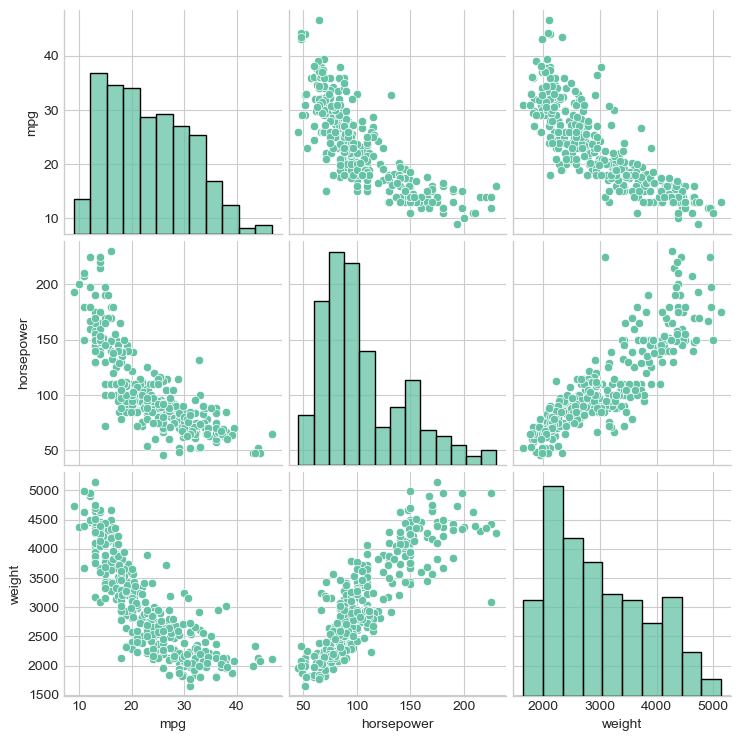

In [13]:
#строим графики
sns.pairplot(DF[['mpg', 'horsepower', 'weight']])
plt.show()

1. Mpg и horsepower. Отрицательная связь. Чем выше мощность, тем ниже экономичность. Это ожидаемо, поскольку более мощные двигатели, как правило, потребляют больше топлива. 
2. Mpg и weight. Отрицательная связь. Чем больше вес автомобиля, тем ниже экономичность. Тяжелые автомобили требуют больше энергии для движения, поэтому потребляют больше топлива. 
3. Horsepower  weight: Положительная связь. Чем больше мощность, тем больше вес. Как правило, более мощные автомобили крупнее и тяжелее.

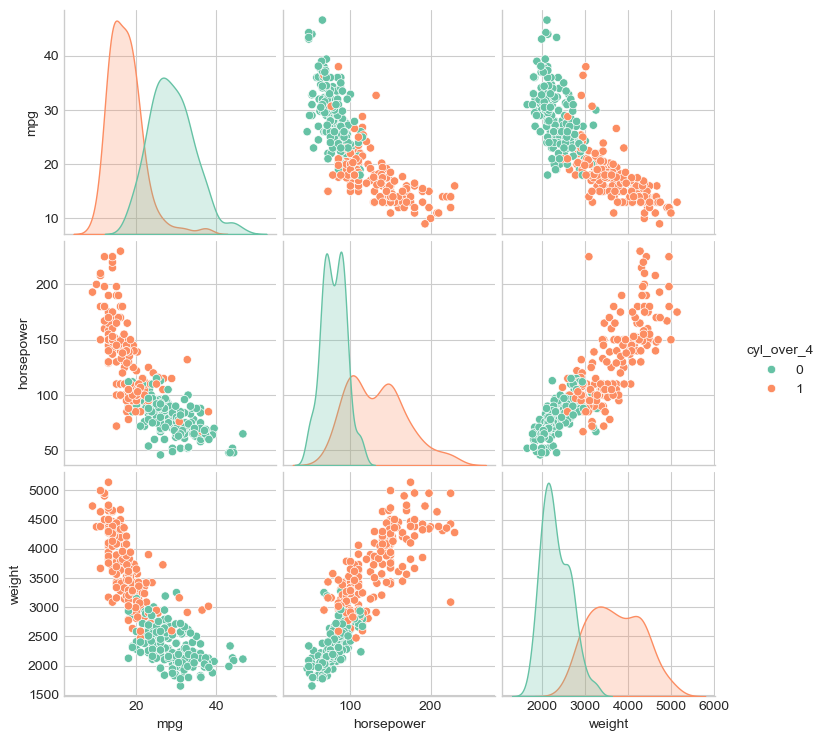

In [14]:
# матричный график разброса с цветом по полу
sns.pairplot(DF[['mpg', 'horsepower', 'weight', 'cyl_over_4']], hue='cyl_over_4')
plt.show()

Вывод:
Машины с 4 цилиндрами и больше имеют больший расход топлива, чем машины с цилинндрами меньше 4, а также большую мощность и больший вес

In [15]:
# корреляционная матрица по всем наблюдениям
corr_mat = DF[['mpg', 'horsepower', 'weight']].corr()
corr_mat.style.background_gradient(cmap='coolwarm').format('{:.2f}')

,mpg,horsepower,weight
mpg,1.00,-0.78,-0.83
horsepower,-0.78,1.00,0.87
weight,-0.83,0.87,1.00


Между mpg и horsepower сильная отрицательная связь, чем больше мощность тем меньше показатель mpg, что значит больший расход топлива
Между mpg и weight также сильная отрицательная связь, чем больше вес тем меньше показатель mpg, что значит больший расход топлива
Мультиколинеарность?

Логарифмируем зависимую переменную, чтобы добиться нормального распределения 

In [16]:
# логарифмируем зависимую переменную
DF['log_mpg'] = np.log(DF['mpg'])
# описательные статистики для непрерывных показателей
DF[['mpg', 'log_mpg', 'horsepower', 'weight']].describe()

,mpg,log_mpg,horsepower,weight
count,353.000000,353.000000,353.000000,353.000000
mean,23.182720,3.087816,105.524079,2999.498584
std,7.663729,0.337566,38.598753,849.648828
min,9.000000,2.197225,46.000000,1649.000000
25%,17.000000,2.833213,76.000000,2246.000000
50%,22.300000,3.104587,95.000000,2815.000000
75%,29.000000,3.367296,130.000000,3651.000000
max,46.600000,3.841601,230.000000,5140.000000


In [17]:
# тестируем на нормальность
for col in ['mpg', 'log_mpg']:
    stat, p = shapiro(DF[col])
    print(col, 'Statistics=%.2f, p=%.4f' % (stat, p))
    # интерпретация
    alpha = 0.05
    if p > alpha:
        print('Распределение нормально (H0 не отклоняется)\n')
    else:
        print('Распределение не нормально (H0 отклоняется)\n')

mpg Statistics=0.97, p=0.0000
Распределение не нормально (H0 отклоняется)

log_mpg Statistics=0.98, p=0.0001
Распределение не нормально (H0 отклоняется)



Тест Шапиро-Уилка показывает, что после логарифмирования log_mpg по-прежнему не
распределена нормально. 

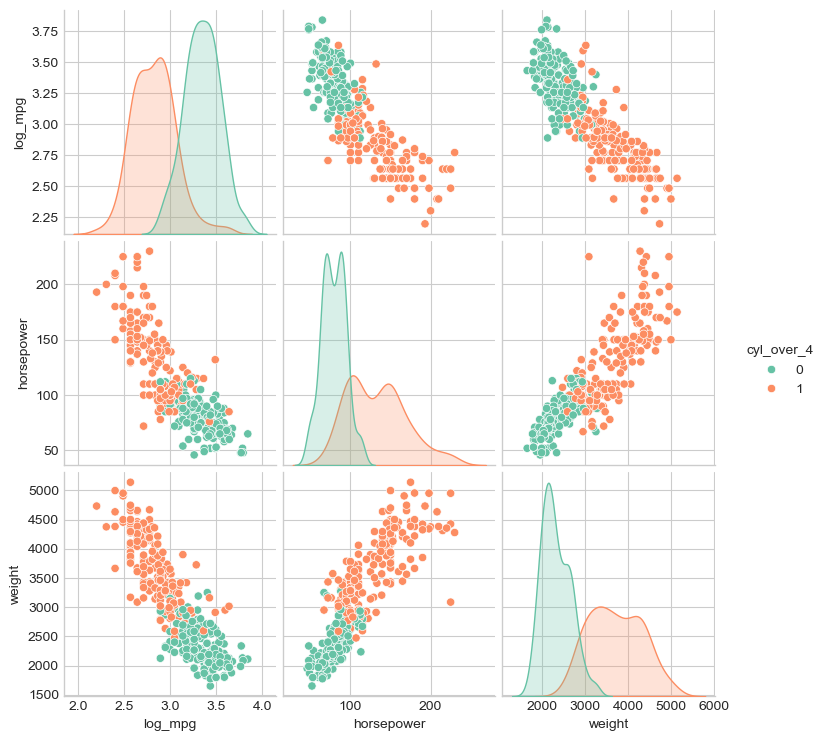

In [18]:
# матричный график разброса с цветом по cyl_over_4
sns.pairplot(DF[['log_mpg', 'horsepower', 'weight',
'cyl_over_4']], hue='cyl_over_4')
plt.show()

Функция плотности на графике ниже выглядит более нормальной, чем была у mpg . Логарифмирование меняет взаимосвязи между
переменными, и, судя по графикам разброса, в нашем случае некоторые стали линейными.

In [19]:
# корреляционная матрица по классу меньше 4 цилиндра
corr_mat = DF.loc[DF['cyl_over_4'] == 0][['log_mpg', 'horsepower', 'weight']].corr()
corr_mat.style.background_gradient(cmap='coolwarm').format('{:.2f}')

,log_mpg,horsepower,weight
log_mpg,1.00,-0.62,-0.52
horsepower,-0.62,1.00,0.66
weight,-0.52,0.66,1.00


In [20]:
# корреляционная матрица по классу 4 цилиндра и больше
corr_mat = DF.loc[DF['cyl_over_4'] == 1][['log_mpg', 'horsepower', 'weight']].corr()
corr_mat.style.background_gradient(cmap='coolwarm').format('{:.2f}')

,log_mpg,horsepower,weight
log_mpg,1.00,-0.68,-0.74
horsepower,-0.68,1.00,0.73
weight,-0.74,0.73,1.00


In [21]:
df0 = DF[['mpg', 'horsepower', 'weight', 'cyl_over_4']]

df2 = DF[['mpg', 'horsepower', 'weight', 'cyl_over_4']]
df2.loc[:, 'horsepower_cyl_over_4'] = df2.loc[:, 'horsepower'] * df2.loc[:, 'cyl_over_4']
df2 = df2.drop(['horsepower'], axis=1)

df3 = DF[['mpg', 'horsepower', 'weight', 'cyl_over_4']]
df3.loc[:, 'weight_cyl_over_4'] = df3.loc[:, 'weight'] * df3.loc[:, 'cyl_over_4']
df3 = df3.drop(['weight'], axis=1)

df4 = DF[['mpg', 'horsepower', 'weight', 'cyl_over_4']]
df4.loc[:, 'horsepower_cyl_over_4'] = df4.loc[:, 'horsepower'] * df4.loc[:, 'cyl_over_4']
df4.loc[:, 'weight_cyl_over_4'] = df4.loc[:, 'weight'] * df4.loc[:, 'cyl_over_4']
df4 = df4.drop(['horsepower', 'weight'], axis=1)


Построим модели от всех объясняющих переменных на всех наблюдениях, чтобы проинтерпретировать параметры 

In [22]:
lm = skl_lm.LinearRegression()
# модель со всеми объясняющими, y
X = df0.drop(['mpg'], axis=1)
y = df0.mpg.values.reshape(-1, 1)
fit_lm_0 = lm.fit(X, y)
print('модель fit_lm_0:\n'
,
'константа ', np.around(fit_lm_0.intercept_, 3),
'\n объясняющие ', list(X.columns.values),
'\n коэффициенты ', np.around(fit_lm_0.coef_, 3))

модель fit_lm_0:
 константа  [41.649] 
 объясняющие  ['horsepower', 'weight', 'cyl_over_4'] 
 коэффициенты  [[-0.053 -0.004 -3.511]]


In [23]:
y_pred = fit_lm_0.predict(X)
MSE = sum((y - y_pred.reshape(-1, 1))**2) / len(y)
MSE

array([16.13250475])

Интерпретируем модель с логарифмированной зависимой переменной 

In [24]:
# модель со всеми объясняющими, y_log
X = df0.drop(['mpg'], axis=1)
y = np.log(df0.mpg).values.reshape(-1, 1)
fit_lm_0_log = lm.fit(X, y)
print('модель fit_lm_0_log:\n'
,
'константа ', np.around(fit_lm_0_log.intercept_, 3),
'\n объясняющие ', list(X.columns.values),
'\n коэффициенты ', np.around(fit_lm_0_log.coef_, 3))

модель fit_lm_0_log:
 константа  [3.977] 
 объясняющие  ['horsepower', 'weight', 'cyl_over_4'] 
 коэффициенты  [[-0.003 -0.    -0.124]]


In [25]:
# пересчёт константы для интерпретации
np.round(np.exp(fit_lm_0_log.intercept_), 1)

array([53.4])

In [26]:
# пересчёт коэффициентов для их интерпретации
np.round((np.exp(fit_lm_0_log.coef_) - 1) * 100, 1)

array([[ -0.3,  -0. , -11.7]])

In [27]:
# оценим MSE на обучающей
# прогнозы
y_pred = fit_lm_0_log.predict(X)
MSE_log = sum((np.exp(y) - np.exp(y_pred).reshape(-1, 1))**2) / len(y)
MSE_log

array([14.98405388])

In [28]:
print('MSE_train модели для log(mpg) меньше MSE_train',
'модели для mpg в ', np.around(MSE / MSE_log, 1), 'раз')

MSE_train модели для log(mpg) меньше MSE_train модели для mpg в  [1.1] раз


Оценка точности
LOOCV

Сделаем перекрёстную проверку точности моделей по одному наблюдению.

In [29]:
# LeaveOneOut CV
loo = LeaveOneOut()
# модели для y
scores = list()
# таймер
tic = time.perf_counter()
for df in [df0, df2, df3, df4] :
    loo.get_n_splits(df)
    X = df.drop(['mpg'], axis=1)
    y = df.mpg
    score = cross_val_score(lm, X, y, cv=loo,
    scoring='neg_mean_squared_error').mean()
    scores.append(score)
# таймер
toc = time.perf_counter()
print(f"Расчёты методом LOOCV заняли {toc - tic:0.2f} секунд")

Расчёты методом LOOCV заняли 1.15 секунд


In [30]:
# модели для y_log
scores_log = list()
# таймер
tic = time.perf_counter()
for df in [df0, df2, df3, df4] :
    loo.get_n_splits(df)
    X = df.drop(['mpg'], axis=1)
    y = np.log(df.mpg)
    score = cross_val_score(lm, X, y, cv=loo, n_jobs=1,
    scoring='neg_mean_squared_error').mean()
    scores_log.append(score)
# таймер
toc = time.perf_counter()
print(f"Расчёты методом LOOCV заняли {toc - tic:0.2f} секунд")

Расчёты методом LOOCV заняли 1.11 секунд


Сравним ошибки для моделей на исходных значениях mpg с ошибками моделей на логарифме.

In [31]:
[np.around(-x, 2) for x in scores]

[np.float64(16.5), np.float64(17.5), np.float64(18.03), np.float64(20.76)]

In [32]:
[np.around(-x, 3) for x in scores_log]

[np.float64(0.024), np.float64(0.026), np.float64(0.026), np.float64(0.03)]

Очевидно, что между собой эти цифры сравнивать нельзя, поскольку процедура
cross_val_score() при расчёте MSE не делает экспоненциирования Y. Поэтому, если
требуется выбрать из всех моделей лучшую, схема работы должна быть следующей:
1. Найти наилучшую модель для .
log(Y )
2. Найти наилучшую модель для .
3. Перестроить их без перекрёстной проверки, оценив MSE методом проверочной выборки.
4. Рассчитать MSE перестроенных моделей вручную и сравнить.

In [33]:
# самая точная на mpg
fits = ['fit_lm_0', 'fit_lm_2', 'fit_lm_3', 'fit_lm_4']
print('Наименьшая ошибка на тестовой с LOOCV у модели',
fits[scores.index(max(scores))],
':\nMSE_loocv =', np.around(-max(scores), 0))

Наименьшая ошибка на тестовой с LOOCV у модели fit_lm_0 :
MSE_loocv = 16.0


In [34]:
# самая точная на log(mpg)
fits = ['fit_lm_0_log', 'fit_lm_2_log',
'fit_lm_3_log', 'fit_lm_4_log']
print('Наименьшая ошибка на тестовой с LOOCV у модели',
fits[scores_log.index(max(scores_log))],
':\nMSE_loocv =', np.around(-max(scores_log), 3))

Наименьшая ошибка на тестовой с LOOCV у модели fit_lm_0_log :
MSE_loocv = 0.024


Перекрёстная проверка по блокам

In [35]:
# Перекрёстная проверка по 10 блокам
folds = 10
# ядра для разбиений перекрёстной проверкой
r_state = np.arange(my_seed, my_seed + 9)
# модели для y
scores = list()
# таймер
tic = time.perf_counter()
i = 0
for df in [df0,df2, df3, df4] :
    X = df.drop(['mpg'], axis=1)
    y = df.mpg
    kf_10 = KFold(n_splits=folds, random_state=r_state[i],
    shuffle=True)
    score = cross_val_score(lm, X, y, cv=kf_10,
    scoring='neg_mean_squared_error').mean()
    scores.append(score)
    i+=1
# таймер
toc = time.perf_counter()
print(f"Расчёты методом CV по 10 блокам заняли {toc - tic:0.2f} секунд")

Расчёты методом CV по 10 блокам заняли 0.04 секунд


In [36]:
# Перекрёстная проверка по 10 блокам
folds = 10
# ядра для разбиений перекрёстной проверкой
r_state = np.arange(my_seed, my_seed + 9)
# модели для y
scores_log = list()
# таймер
tic = time.perf_counter()
i = 0
for df in [df0, df2, df3, df4] :
    X = df.drop(['mpg'], axis=1)
    y = np.log(df.mpg)
    kf_10 = KFold(n_splits=folds, random_state=r_state[i],
    shuffle=True)
    score = cross_val_score(lm, X, y, cv=kf_10,
    scoring='neg_mean_squared_error').mean()
    scores_log.append(score)
    i+=1
# таймер
toc = time.perf_counter()
print(f"Расчёты методом CV по 10 блокам заняли {toc - tic:0.2f} секунд")

Расчёты методом CV по 10 блокам заняли 0.04 секунд


In [37]:
# самая точная на charges
fits = ['fit_lm_0', 'fit_lm_2', 'fit_lm_3', 'fit_lm_4']
print('Наименьшая ошибка на тестовой с k-fold10 у модели',
fits[scores.index(max(scores))],
':\nMSE_kf10 =', np.around(-max(scores), 0))

Наименьшая ошибка на тестовой с k-fold10 у модели fit_lm_0 :
MSE_kf10 = 17.0


In [38]:
# самая точная на log(charges)
fits = ['fit_lm_0_log', 'fit_lm_2_log',
'fit_lm_3_log', 'fit_lm_4_log']
print('Наименьшая ошибка на тестовой с k-fold10 у модели',
fits[scores_log.index(max(scores_log))],
':\nMSE_kf10 =', np.around(-max(scores_log), 3))

Наименьшая ошибка на тестовой с k-fold10 у модели fit_lm_0_log :
MSE_kf10 = 0.024


Можно убедиться, что оценка MSE методом перекрёстной проверки по 10 блокам даёт
результаты, практически идентичные методу LOOCV. При этом скорость у первого метода при
392 наблюдениях выше на полтора порядка.

Самой точной среди моделей для mpg оказалась fit_lm_0 , а среди моделей для
mpg_log – fit_lm_0 . Оценим точность прогноза по этим моделям на отложенные
наблюдения.

In [39]:
# ещё раз строим на обучающей
X = df0.drop(['mpg'], axis=1)
y = df0.mpg.values.reshape(-1, 1)
fit_lm_0 = lm.fit(X, y)
print('модель fit_lm_0:\n'
,
'константа ', np.around(fit_lm_0.intercept_, 3),
'\n объясняющие ', list(df0.drop(['mpg'], axis=1).columns.values),
'\n коэффициенты ', np.around(fit_lm_0.coef_, 3))

модель fit_lm_0:
 константа  [41.649] 
 объясняющие  ['horsepower', 'weight', 'cyl_over_4'] 
 коэффициенты  [[-0.053 -0.004 -3.511]]


Сделаем прогноз mpg по модели fit_lm_0 на отложенные
наблюдения.

In [45]:
X = df0.drop(['mpg'], axis=1)
y = df0.mpg.values.reshape(-1, 1)
fit_lm_0 = lm.fit(X, y)

In [46]:
# делаем данные для модели из отложенных наблюдений
df0 = DF_predict[['mpg','horsepower', 'weight', 'cyl_over_4']]

X = df0.drop(['mpg'], axis=1)
y = df0.mpg.values.reshape(-1, 1)
# прогноз
y_pred = fit_lm_0.predict(X)
# ошибка
MSE = sum((y - y_pred.reshape(-1, 1))**2) / len(y)
np.around(MSE, 2)

array([20.66])

In [47]:
# сравниваем ошибку со средним значением Y на отложенных
print('Ошибка модели на отложенных наблюдениях составила ',
np.around(np.sqrt(MSE) / np.mean(y) * 100, 1)[0],'% от среднего значения Y',
sep='')

Ошибка модели на отложенных наблюдениях составила 17.6% от среднего значения Y
